In [107]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn
from sklearn import linear_model
import seaborn as sns
import statsmodels.formula.api as smf
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import os
%matplotlib inline 
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [108]:
## Import the file for Challenge
os.path.isfile('/Users/ldawes/Desktop/crime_data.csv')
df = pd.read_csv('/Users/ldawes/Desktop/crime_data.csv') 
df.columns = ['city', 'population', 'violent_crime', 'murder_manslaughter', 'rape1', 'rape2', 
              'robbery', 'assualt', 'property crime', 'burglary', 'larceny', 'motor_theft', 'arson','unnamed']
df.head()

,city,population,violent_crime,murder_manslaughter,rape1,rape2,robbery,assualt,property crime,burglary,larceny,motor_theft,arson,unnamed
0,Adrian,"1,633",3,0,0,nan,0,3,41,11,29,1,0.000,nan
1,Advance,"1,341",1,1,0,nan,0,0,21,5,16,0,0.000,nan
2,Anderson,"1,999",14,1,3,nan,0,10,105,31,68,6,1.000,nan
3,Annapolis,349,0,0,0,nan,0,0,3,0,2,1,0.000,nan
4,Appleton City,"1,081",0,0,0,nan,0,0,13,3,9,1,0.000,nan


In [109]:
#A glimpse of the data tells us that we need to clean it.
df.head(20)

,city,population,violent_crime,murder_manslaughter,rape1,rape2,robbery,assualt,property crime,burglary,larceny,motor_theft,arson,unnamed
0,Adrian,"1,633",3,0,0,nan,0,3,41,11,29,1,0.000,nan
1,Advance,"1,341",1,1,0,nan,0,0,21,5,16,0,0.000,nan
2,Anderson,"1,999",14,1,3,nan,0,10,105,31,68,6,1.000,nan
3,Annapolis,349,0,0,0,nan,0,0,3,0,2,1,0.000,nan
4,Appleton City,"1,081",0,0,0,nan,0,0,13,3,9,1,0.000,nan
5,Arbyrd,504,0,0,0,nan,0,0,0,0,0,0,0.000,nan
6,Archie,"1,187",0,0,0,nan,0,0,3,2,1,0,0.000,nan
7,Arnold,"21,070",36,0,5,nan,10,21,674,42,602,30,0.000,nan
8,Ash Grove,"1,479",2,0,0,nan,0,2,30,3,25,2,0.000,nan
9,Ashland,"3,844",19,0,1,nan,0,18,78,9,67,2,0.000,nan


In [110]:
df.shape

(445, 14)

In [111]:
# Check what type of data I have.
df.dtypes

city                    object
population              object
violent_crime           object
murder_manslaughter      int64
rape1                    int64
rape2                  float64
robbery                 object
assualt                 object
property crime          object
burglary                object
larceny                 object
motor_theft             object
arson                  float64
unnamed                float64
dtype: object

In [112]:
# first remove the commas 
df['robbery'] = df['robbery'].str.replace(',', '')
df['population'] = df['population'].str.replace(',', '')
df['property crime'] = df['property crime'].str.replace(',', '')
df['violent_crime'] = df['violent_crime'].str.replace(',', '')
df['assualt'] = df['assualt'].str.replace(',', '')
df['burglary'] = df['burglary'].str.replace(',', '')
df['larceny'] = df['larceny'].str.replace(',', '')
df['motor_theft'] = df['motor_theft'].str.replace(',', '')

In [113]:
# Convert objects into float
df['robbery'] = df['robbery'].apply(pd.to_numeric)
df['population'] = df['population'].apply(pd.to_numeric)
df['property crime'] = df['property crime'].apply(pd.to_numeric)
df['violent_crime'] = df['violent_crime'].apply(pd.to_numeric)
df['assualt'] = df['assualt'].apply(pd.to_numeric)
df['burglary'] = df['burglary'].apply(pd.to_numeric)
df['larceny'] = df['larceny'].apply(pd.to_numeric)
df['motor_theft'] = df['motor_theft'].apply(pd.to_numeric)

In [114]:
# Remove 'rape2' and unnamed since there's no data
df= df.drop('rape2', 1)
df=df.drop('unnamed',1)

In [115]:
# Remove the Nan 
df = df.dropna(how='any')

In [116]:
# Attempting to clean the data a bit before using it.
df.describe()

,population,violent_crime,murder_manslaughter,rape1,robbery,assualt,property crime,burglary,larceny,motor_theft,arson
count,444.000,444.000,444.000,444.000,444.000,444.000,444.000,444.000,444.000,444.000,444.000
mean,8399.944,48.045,0.687,4.047,11.480,31.831,344.052,64.423,249.020,30.608,1.736
std,30302.122,380.011,7.415,27.767,106.786,239.894,1759.268,390.729,1129.756,265.823,13.459
min,53.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,835.500,1.000,0.000,0.000,0.000,1.000,11.000,2.000,6.000,0.000,0.000
50%,1987.000,5.000,0.000,0.000,0.000,4.000,41.000,9.000,30.500,2.000,0.000
75%,5798.000,16.000,0.000,1.000,2.000,12.250,181.250,30.000,137.750,8.000,1.000
max,465514.000,5864.000,120.000,377.000,1662.000,3726.000,24648.000,6412.000,13949.000,4287.000,207.000


In [117]:
# Due to outliers, retain data by turning some parameters as categorical data. 
df['Murder_cat'] = np.where(df.loc[:, 'murder_manslaughter']>0, 1, 0) 
df['Robbery_cat'] = np.where(df.loc[:, 'robbery']>0, 1, 0) 
df['Violent_cat'] = np.where(df.loc[:, 'violent_crime']>0, 1, 0) 
# Remove large outliers in each column in an effort to normalize data. 
df = df.query('population<20000')
df = df.query('rape1<500')
df = df.query('burglary<500')
df = df.query('larceny<500')
df = df.query('assualt<500')
df = df.query('motor_theft<500')

In [118]:
# Inspect variable correlation for feature selection
corr_matrix = df.corr()
print(corr_matrix)

                     population  violent_crime  murder_manslaughter  rape1  \
population                1.000          0.587                0.291  0.571   
violent_crime             0.587          1.000                0.560  0.618   
murder_manslaughter       0.291          0.560                1.000  0.279   
rape1                     0.571          0.618                0.279  1.000   
robbery                   0.457          0.805                0.675  0.454   
assualt                   0.551          0.976                0.459  0.534   
property crime            0.841          0.728                0.386  0.594   
burglary                  0.693          0.831                0.596  0.584   
larceny                   0.840          0.655                0.297  0.563   
motor_theft               0.634          0.741                0.567  0.546   
arson                     0.416          0.589                0.286  0.553   
Murder_cat                0.294          0.377                0.

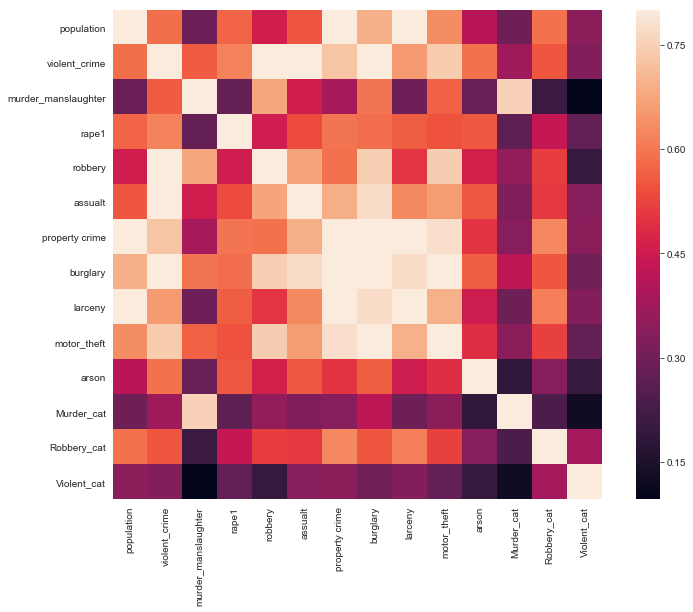

In [119]:
# Checking out the initial correlation of the data set presented.
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.set_style('darkgrid')
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [120]:
# Split data into train/test sets (70/30)
x = df.loc[:, ['robbery', 'burglary', 'larceny']]
y = df.loc[:, ['murder_manslaughter']]

# Split data using sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=43)

In [121]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)

# Fit the model.
fit = lr.fit(x_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(x_test)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y_test))

print('\n Percentage accuracy')
print(lr.score(x_test, y_test))

Coefficients
[[-0.15991604 -0.01719744 -0.00302321]
 [ 0.06031096  0.00365186  0.00609328]
 [ 0.24515518  0.04472331 -0.0083205 ]]
[ 4.07449901 -4.05227017 -6.3798526 ]

 Accuracy by admission status


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ValueError: Shape of passed values is (1, 2), indices imply (120, 2)

In [122]:
# Type out the logistic regression again for the ridge regression.
new_lr = LogisticRegression()

# Start with a GridSearchCV to find the best parameters
parameters = {'penalty':['l2'],
             'C':[0.0001,0.001,0.01,0.1,1,10,100,10000,100000,100000000]}

grid = GridSearchCV(new_lr, parameters, cv=10, verbose=3)

#Fit the data
grid.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.0001, penalty=l2 ............................................
[CV] .................. C=0.0001, penalty=l2, score=0.9, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ... C=0.0001, penalty=l2, score=0.9310344827586207, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ... C=0.0001, penalty=l2, score=0.9310344827586207, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ... C=0.0001, penalty=l2, score=0.9629629629629629, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ... C=0.0001, penalty=l2, score=0.9629629629629629, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ... C=0.0001, penalty=l2, score=0.9629629629629629, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ... C=0.0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/

[CV] ..... C=0.01, penalty=l2, score=0.9259259259259259, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ..... C=0.01, penalty=l2, score=0.9629629629629629, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ..... C=0.01, penalty=l2, score=0.9629629629629629, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ..................... C=0.1, penalty=l2, score=0.9, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ...... C=0.1, penalty=l2, score=0.9310344827586207, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ...... C=0.1, penalty=l2, score=0.9310344827586207, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ...... C=0.1, penalty=l2, score=0.9629629629629629, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] .

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. S

[CV] ....... C=10, penalty=l2, score=0.9259259259259259, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.9629629629629629, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.9629629629629629, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.9629629629629629, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.9259259259259259, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.9629629629629629, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.9259259259259259, total=   0.0s
[CV] C=100, penalty=l2 ...............................................
[CV] .

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. S

[CV] .... C=10000, penalty=l2, score=0.9259259259259259, total=   0.0s
[CV] C=100000, penalty=l2 ............................................
[CV] ... C=100000, penalty=l2, score=0.9333333333333333, total=   0.0s
[CV] C=100000, penalty=l2 ............................................
[CV] ... C=100000, penalty=l2, score=0.9310344827586207, total=   0.0s
[CV] C=100000, penalty=l2 ............................................
[CV] ... C=100000, penalty=l2, score=0.9310344827586207, total=   0.0s
[CV] C=100000, penalty=l2 ............................................
[CV] ... C=100000, penalty=l2, score=0.9259259259259259, total=   0.0s
[CV] C=100000, penalty=l2 ............................................
[CV] ... C=100000, penalty=l2, score=0.9629629629629629, total=   0.0s
[CV] C=100000, penalty=l2 ............................................
[CV] ... C=100000, penalty=l2, score=0.9629629629629629, total=   0.0s
[CV] C=100000, penalty=l2 ............................................
[CV] .

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. S

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, 100000, 100000000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [123]:
#return best parameters and best score
print('Best parameters:')
print(grid.best_params_)
print('Best Score:')
print(grid.best_score_)

Best parameters:
{'C': 0.0001, 'penalty': 'l2'}
Best Score:
0.9494584837545126


In [124]:
#Metrics
pred_y_sklearn = grid.predict(x_test)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y_test))

print('\n Ridge Regression Percentage accuracy:')
print(grid.score(x_test, y_test))


 Accuracy by admission status


ValueError: Shape of passed values is (1, 2), indices imply (120, 2)

In [104]:
# set up parameters for Lasso regression
new_lr = LogisticRegression()

# Start with a GridSearchCV to find the best parameters
parameters = {'penalty':['l1'],
             'C':[0.0001,0.001,0.01,0.1,1,10,100,10000,100000,100000000]}

grid = GridSearchCV(new_lr, parameters, cv=10, verbose=3)

#Fit the data
grid.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=0.9, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ... C=0.0001, penalty=l1, score=0.9310344827586207, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ... C=0.0001, penalty=l1, score=0.9310344827586207, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ... C=0.0001, penalty=l1, score=0.9629629629629629, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ... C=0.0001, penalty=l1, score=0.9629629629629629, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ... C=0.0001, penalty=l1, score=0.9629629629629629, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ... C=0.0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/

[CV] ..... C=0.01, penalty=l1, score=0.9629629629629629, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.9629629629629629, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.9629629629629629, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.9629629629629629, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.9629629629629629, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ..................... C=0.1, penalty=l1, score=0.9, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.9310344827586207, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] .

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. S

[CV] ....... C=10, penalty=l1, score=0.9333333333333333, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ....... C=10, penalty=l1, score=0.9310344827586207, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ....... C=10, penalty=l1, score=0.9310344827586207, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ....... C=10, penalty=l1, score=0.9259259259259259, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ....... C=10, penalty=l1, score=0.9629629629629629, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ....... C=10, penalty=l1, score=0.9629629629629629, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ....... C=10, penalty=l1, score=0.9629629629629629, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] .

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was 

[CV] .... C=10000, penalty=l1, score=0.9259259259259259, total=   0.0s
[CV] C=10000, penalty=l1 .............................................
[CV] .... C=10000, penalty=l1, score=0.9629629629629629, total=   0.0s
[CV] C=10000, penalty=l1 .............................................
[CV] .... C=10000, penalty=l1, score=0.9259259259259259, total=   0.0s
[CV] C=100000, penalty=l1 ............................................
[CV] ... C=100000, penalty=l1, score=0.9333333333333333, total=   0.0s
[CV] C=100000, penalty=l1 ............................................
[CV] ... C=100000, penalty=l1, score=0.9310344827586207, total=   0.0s
[CV] C=100000, penalty=l1 ............................................
[CV] ... C=100000, penalty=l1, score=0.9310344827586207, total=   0.0s
[CV] C=100000, penalty=l1 ............................................
[CV] ... C=100000, penalty=l1, score=0.9259259259259259, total=   0.0s
[CV] C=100000, penalty=l1 ............................................
[CV] .

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. S

[CV]  C=100000000, penalty=l1, score=0.9259259259259259, total=   0.0s


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, 100000, 100000000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [105]:
#return best parameters and best score
print('Best parameters:')
print(grid.best_params_)
print('Best Score:')
print(grid.best_score_)

Best parameters:
{'C': 0.0001, 'penalty': 'l1'}
Best Score:
0.9494584837545126


In [106]:
#Metrics
pred_y_sklearn = grid.predict(x_test)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y_test))

print('\n Lasso Regression Percentage accuracy:')
print(grid.score(x_test, y_test))


 Accuracy by admission status


ValueError: Shape of passed values is (1, 2), indices imply (120, 2)